In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [ ]:
#Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/csv_data/creditcard.csv')

In [ ]:
print(df[df['Class']==0].shape)
print(df[df['Class']==1].shape)

(284315, 31)
(492, 31)


In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Visualisation of reviewers nationality
for col in df.columns.values: # For each column

    unique_values = pd.unique(df[col].astype(str)) # Create a list of unique values
    text = '\n \033[33m' + col + '\033[0m is of data type \033[32m' + str(df[col].dtypes) + '\033[0m , has \033[91m' + str(len(unique_values)) + '\033[0m unique values, and \033[91m' + str(df[col].isnull().sum()) + '\033[0m null values'
    print(text)

    if len(unique_values) < 10: # If the column have less than 10 unique then print them
        print(unique_values)


 Time is of data type float64 , has 124592 unique values, and 0 null values

 V1 is of data type float64 , has 275663 unique values, and 0 null values

 V2 is of data type float64 , has 275663 unique values, and 0 null values

 V3 is of data type float64 , has 275663 unique values, and 0 null values

 V4 is of data type float64 , has 275663 unique values, and 0 null values

 V5 is of data type float64 , has 275663 unique values, and 0 null values

 V6 is of data type float64 , has 275663 unique values, and 0 null values

 V7 is of data type float64 , has 275663 unique values, and 0 null values

 V8 is of data type float64 , has 275663 unique values, and 0 null values

 V9 is of data type float64 , has 275663 unique values, and 0 null values

 V10 is of data type float64 , has 275663 unique values, and 0 null values

 V11 is of data type float64 , has 275663 unique values, and 0 null values

 V12 is of data type float64 , has 275663 unique values, and 0 null values

 V13 is of data typ

array([[<Axes: title={'center': 'Class'}>]], dtype=object)

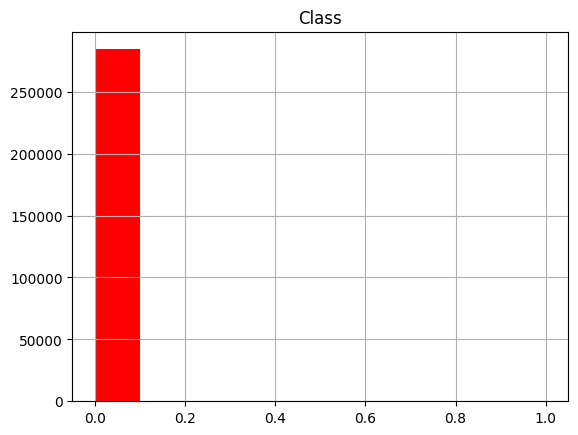

In [ ]:
df.hist(column='Class', color='red')

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
print ("Fraud")
print (df.Time[df.Class == 1].describe())
print ()
print ("Normal")
print (df.Time[df.Class == 0].describe())

Fraud
count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

Normal
count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64


In [ ]:
v_features = df.iloc[:,1:29].columns

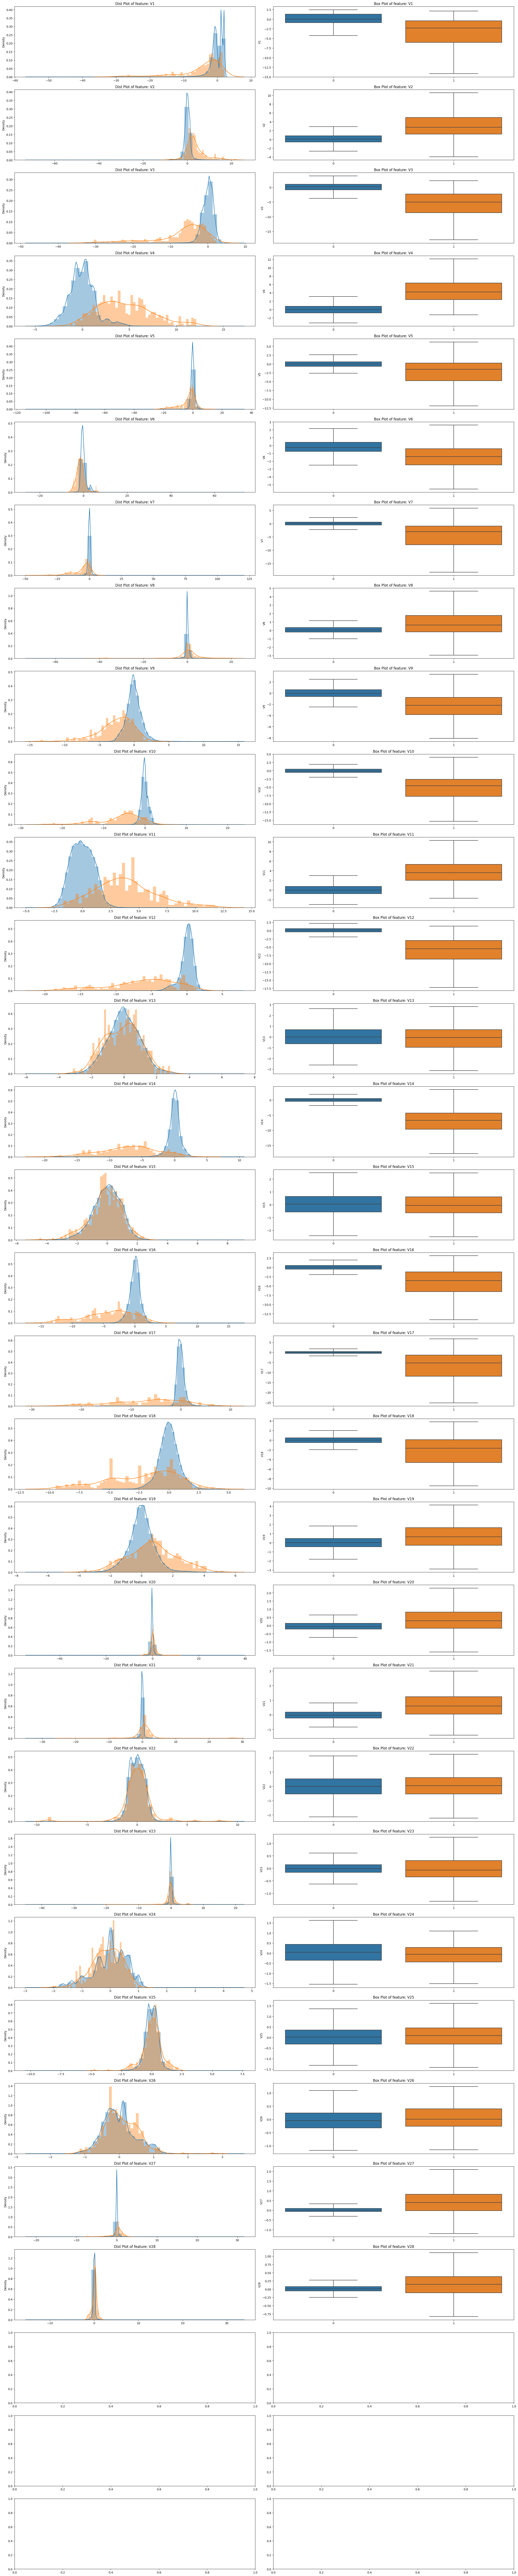

In [ ]:
rows, cols = df.shape[1], 2
figsize = (25, 4*rows)
fig, axes = plt.subplots(rows, cols, figsize=figsize)
for i, cn in enumerate(df[v_features]):
    sns.distplot(df[cn][df.Class == 0], bins=50, ax=axes[i,0])
    sns.distplot(df[cn][df.Class == 1], bins=50, ax=axes[i,0])
    sns.boxplot(data=df, x='Class', y=cn, showfliers=False, ax=axes[i, 1])
    # sns.distplot(df[cn][df.Class == 0], bins=50, ax=axes[0])
    axes[i, 0].set_xlabel('')
    axes[i, 0].set_title('Dist Plot of feature: ' + str(cn))
    axes[i, 1].set_xlabel('')
    axes[i, 1].set_title('Box Plot of feature: ' + str(cn))
plt.tight_layout()
plt.show()

In [ ]:
# plt.figure(figsize=(12,28*4))
# gs = gridspec.GridSpec(28, 1)
# for i, cn in enumerate(df[v_features]):
#     ax = plt.subplot(gs[i])
#     sns.distplot(df[cn][df.Class == 1], bins=50)
#     sns.distplot(df[cn][df.Class == 0], bins=50)
#     ax.set_xlabel('')
#     ax.set_title('histogram of feature: ' + str(cn))
# plt.show()

In [ ]:
#Drop all of the features that have very similar distributions between the two types of transactions.
df = df.drop(['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8'], axis =1)

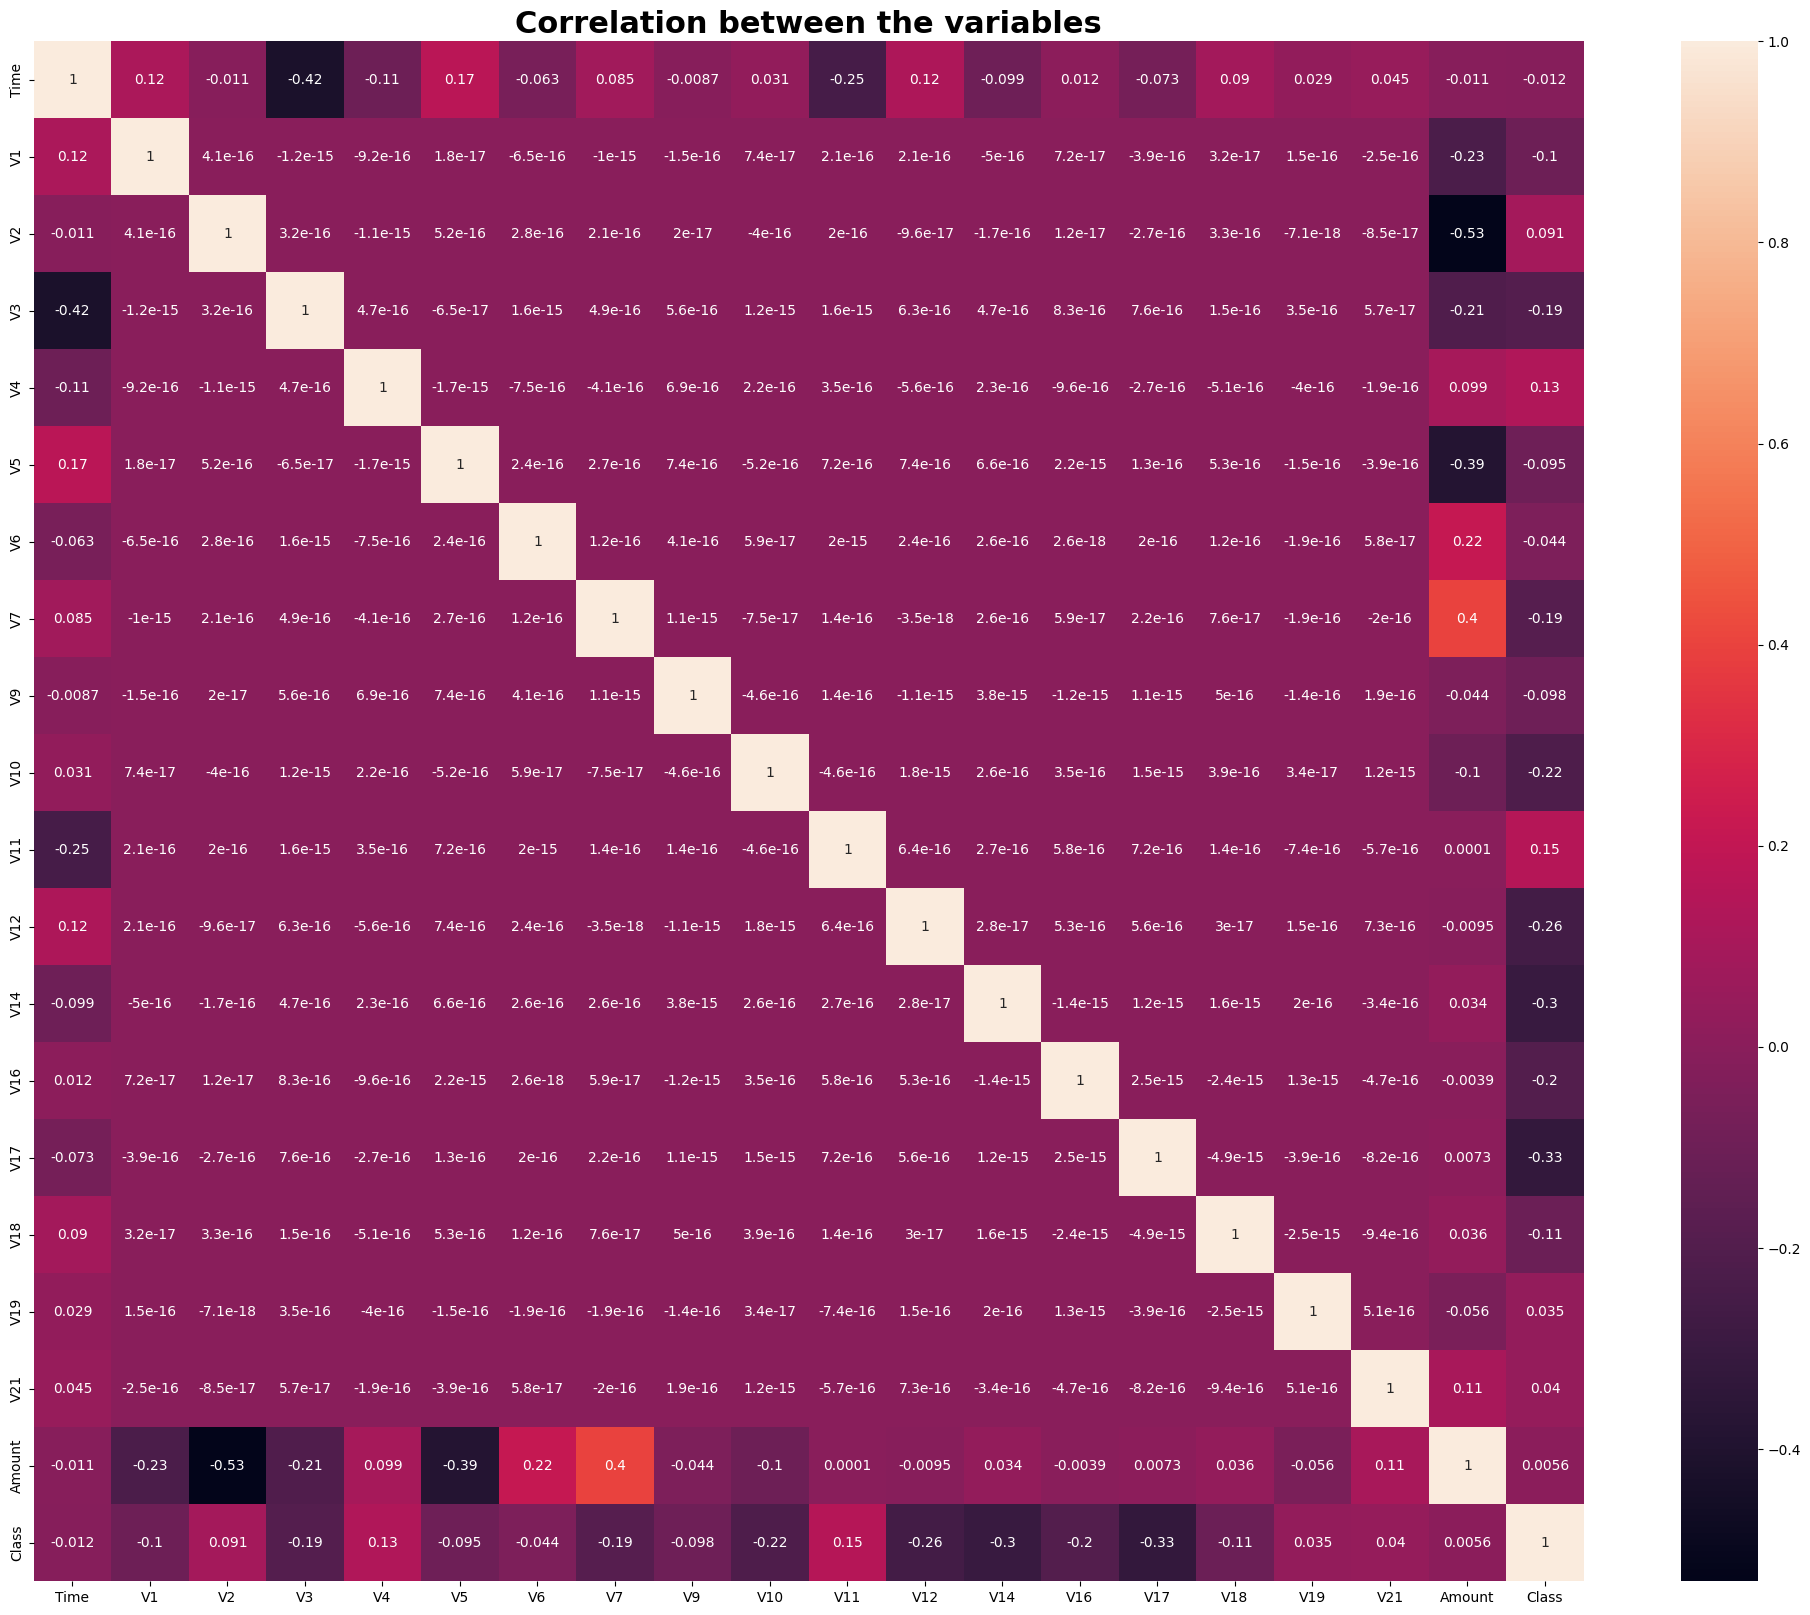

In [ ]:
df_corr = df.corr()
plt.figure(figsize=(25,20))
sns.heatmap(df_corr, annot = True)
plt.title("Correlation between the variables", weight = 'bold', fontsize = 22)
plt.show()

In [ ]:
#Rename 'Class' to 'Fraud'.
df = df.rename(columns={'Class': 'Fraud'})

In [ ]:
X = df.drop('Fraud', axis=1)
y = df['Fraud']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [ ]:
X_train.shape

(227845, 19)

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
                          keras.layers.Dense(19, input_shape=(19,), activation='relu'),
                          keras.layers.Dense(256, activation='relu'),
                          keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
7121/7121 [==============================] - 24s 3ms/step - loss: 7.7727 - accuracy: 0.9965
Epoch 2/10
7121/7121 [==============================] - 16s 2ms/step - loss: 0.0310 - accuracy: 0.9981
Epoch 3/10
7121/7121 [==============================] - 14s 2ms/step - loss: 0.0220 - accuracy: 0.9983
Epoch 4/10
7121/7121 [==============================] - 14s 2ms/step - loss: 0.0392 - accuracy: 0.9983
Epoch 5/10
7121/7121 [==============================] - 14s 2ms/step - loss: 0.0202 - accuracy: 0.9982
Epoch 6/10
7121/7121 [==============================] - 15s 2ms/step - loss: 0.0253 - accuracy: 0.9981
Epoch 7/10
7121/7121 [==============================] - 14s 2ms/step - loss: 0.0204 - accuracy: 0.9981
Epoch 8/10
7121/7121 [==============================] - 14s 2ms/step - loss: 0.0201 - accuracy: 0.9981
Epoch 9/10
7121/7121 [==============================] - 14s 2ms/step - loss: 0.0143 - accuracy: 0.9983
Epoch 10/10
7121/7121 [==============================] - 14s 2ms/step - l

In [ ]:
model.evaluate(X_test, y_test)

1781/1781 [==============================] - 3s 2ms/step - loss: 0.0127 - accuracy: 0.9983


[0.012668189592659473, 0.9982795715332031]

In [ ]:
yp = model.predict(X_test)

1781/1781 [==============================] - 3s 2ms/step


In [ ]:
y_pred=[]
for element in yp:
    if element>0.5: y_pred.append(1)
    else: y_pred.append(0)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X,y)

print(len(y_sm))

568630


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
                          keras.layers.Dense(19, input_shape=(19,), activation='relu'),
                          keras.layers.Dense(256, activation='relu'),
                          keras.layers.Dense(256, activation='relu'),
                          keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)
model.evaluate(X_test, y_test)

Epoch 1/10
14216/14216 [==============================] - 53s 4ms/step - loss: 12.7911 - accuracy: 0.5588
Epoch 2/10
14216/14216 [==============================] - 53s 4ms/step - loss: 0.7242 - accuracy: 0.5005
Epoch 3/10
14216/14216 [==============================] - 53s 4ms/step - loss: 0.7199 - accuracy: 0.5000
Epoch 4/10
14216/14216 [==============================] - 54s 4ms/step - loss: 0.7390 - accuracy: 0.5004
Epoch 5/10
14216/14216 [==============================] - 53s 4ms/step - loss: 0.7062 - accuracy: 0.5008
Epoch 6/10
14216/14216 [==============================] - 52s 4ms/step - loss: 0.7159 - accuracy: 0.5010
Epoch 7/10
14216/14216 [==============================] - 56s 4ms/step - loss: 0.7061 - accuracy: 0.4995
Epoch 8/10
14216/14216 [==============================] - 55s 4ms/step - loss: 0.7056 - accuracy: 0.5007
Epoch 9/10
14216/14216 [==============================] - 52s 4ms/step - loss: 0.7406 - accuracy: 0.5005
Epoch 10/10
3554/3554 [==============================]

[0.6925839185714722, 0.500518798828125]

In [ ]:
yp = model.predict(X)
y_pred=[]
for element in yp:
    if element>0.5: y_pred.append(1)
    else: y_pred.append(0)

print(classification_report(y, y_pred))

8901/8901 [==============================] - 15s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.07      0.00      0.01       492

    accuracy                           1.00    284807
   macro avg       0.53      0.50      0.50    284807
weighted avg       1.00      1.00      1.00    284807



0.8788755429717039


Text(20.72222222222222, 0.5, 'Truth')

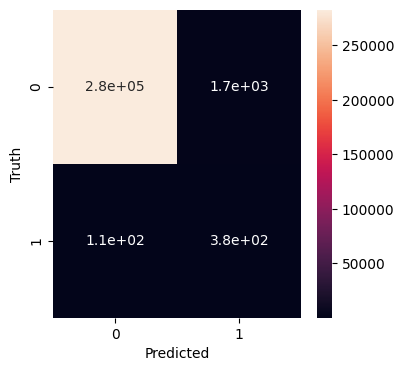

In [ ]:
from sklearn.naive_bayes import GaussianNB
model_5 = GaussianNB()
model_5.fit(X_train, y_train)

print(model_5.score(X_test, y_test))

from sklearn.metrics import confusion_matrix
y_predicted = model_5.predict(X)

cm_5 = confusion_matrix(y, y_predicted)

import seaborn as sn
plt.figure(figsize= (4,4))
sn.heatmap(cm_5, annot=True, cbar= True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y, y_predicted))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    284315
           1       0.19      0.78      0.30       492

    accuracy                           0.99    284807
   macro avg       0.59      0.89      0.65    284807
weighted avg       1.00      0.99      1.00    284807



0.9972718367174964


Text(20.72222222222222, 0.5, 'Truth')

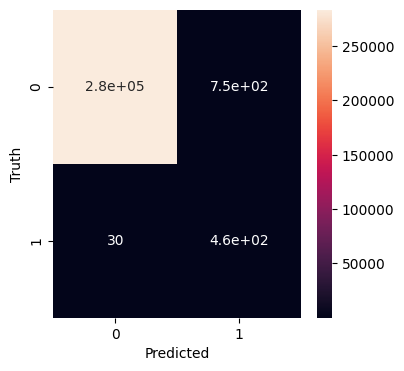

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_2 = RandomForestClassifier(max_depth=10, n_estimators=10)
model_2.fit(X_train, y_train)

print(model_2.score(X, y))

from sklearn.metrics import confusion_matrix
y_predicted = model_2.predict(X)

cm_2 = confusion_matrix(y.astype('int'), y_predicted)

import seaborn as sn
plt.figure(figsize= (4,4))
sn.heatmap(cm_2, annot=True, cbar= True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.38      0.94      0.54       492

    accuracy                           1.00    284807
   macro avg       0.69      0.97      0.77    284807
weighted avg       1.00      1.00      1.00    284807



In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, y)

In [ ]:
X_over.shape

(568630, 19)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=15, stratify=y_sm)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_2 = RandomForestClassifier(max_depth=10, n_estimators=10)
model_2.fit(X_train, y_train)

print(model_2.score(X, y))

from sklearn.metrics import confusion_matrix
y_predicted = model_2.predict(X)

cm_2 = confusion_matrix(y.astype('int'), y_predicted)

print(cm_2)

0.9990941233888212
[[284063    252]
 [     6    486]]


In [ ]:
print(classification_report(y, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.66      0.99      0.79       492

    accuracy                           1.00    284807
   macro avg       0.83      0.99      0.89    284807
weighted avg       1.00      1.00      1.00    284807

